In [1]:
import nltk
#for knowing the path of nltk on the computer
print(nltk.__file__)

C:\Users\user\Anaconda3\lib\site-packages\nltk\__init__.py


## Stemmer : remplace les mots par leur racine 

In [2]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
#example_list = ['python','pythoner','pythoning','pythoned','pythonly']
#for w in example_list:
#     print(ps.stem(w))
new_text = "It is important to by very pythonly while you are pythoning with python. All pythoners have pythoned poorly at least once."
words = word_tokenize(new_text)
for w in words:
     print(ps.stem(w))

It
is
import
to
by
veri
pythonli
while
you
are
python
with
python
.
all
python
have
python
poorli
at
least
onc
.


## Part of Speech Tagging(recognizing nature of words[verbs, pronoun, ...])

In [3]:
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
#POS tag list:
#
#CC	coordinating conjunction
#CD	cardinal digit
#DT	determiner
#EX	existential there (like: "there is" ... think of it like "there exists")
#FW	foreign word
#IN	preposition/subordinating conjunction
#JJ	adjective	'big'
#JJR	adjective, comparative	'bigger'
#JJS	adjective, superlative	'biggest'
#LS	list marker	1)
#MD	modal	could, will
#NN	noun, singular 'desk' 
#NNS	noun plural	'desks'
#NNP	proper noun, singular	'Harrison'
#NNPS	proper noun, plural	'Americans'
#PDT	predeterminer	'all the kids'
#POS	possessive ending	parent\'s
#PRP	personal pronoun	I, he, she
#PRP$	possessive pronoun	my, his, hers
#RB	adverb	very, silently,
#RBR	adverb, comparative	better
#RBS	adverb, superlative	best
#RP	particle	give up
#TO	to	go 'to' the store.
#UH	interjection	errrrrrrrm
#VB	verb, base form	take
#VBD	verb, past tense	took
#VBG	verb, gerund/present participle	taking
#VBN	verb, past participle	taken
#VBP	verb, sing. present, non-3d	take
#VBZ	verb, 3rd person sing. present	takes
#WDT	wh-determiner	which
#WP	wh-pronoun	who, what
#WP$	possessive wh-pronoun	whose
#WRB	wh-abverb	where, when
train_text = state_union.raw("2005-GWBush.txt")
sample_text = state_union.raw("2006-GWBush.txt")

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)
tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

    except Exception as e:
        print(str(e))


process_content()

[('PRESIDENT', 'NNP'), ('GEORGE', 'NNP'), ('W.', 'NNP'), ('BUSH', 'NNP'), ("'S", 'POS'), ('ADDRESS', 'NNP'), ('BEFORE', 'IN'), ('A', 'NNP'), ('JOINT', 'NNP'), ('SESSION', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('CONGRESS', 'NNP'), ('ON', 'NNP'), ('THE', 'NNP'), ('STATE', 'NNP'), ('OF', 'IN'), ('THE', 'NNP'), ('UNION', 'NNP'), ('January', 'NNP'), ('31', 'CD'), (',', ','), ('2006', 'CD'), ('THE', 'NNP'), ('PRESIDENT', 'NNP'), (':', ':'), ('Thank', 'NNP'), ('you', 'PRP'), ('all', 'DT'), ('.', '.')]
[('Mr.', 'NNP'), ('Speaker', 'NNP'), (',', ','), ('Vice', 'NNP'), ('President', 'NNP'), ('Cheney', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('Congress', 'NNP'), (',', ','), ('members', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('Supreme', 'NNP'), ('Court', 'NNP'), ('and', 'CC'), ('diplomatic', 'JJ'), ('corps', 'NN'), (',', ','), ('distinguished', 'JJ'), ('guests', 'NNS'), (',', ','), ('and', 'CC'), ('fellow', 'JJ'), ('citizens', 'NNS'), (':', ':'), ('Today', 'VB'), ('our', 'PRP$'), ('nat

## Chunking : Create groups of words depending on the regexp describing their nature words are between {}

In [4]:
def process_content_v2():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunk = chunkParser.parse(tagged)
            print(chunk)
            chunk.draw()

    except Exception as e:
        print(str(e))

process_content_v2()

(S
  (Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
  'S/POS
  (Chunk ADDRESS/NNP)
  BEFORE/IN
  (Chunk A/NNP JOINT/NNP SESSION/NNP)
  OF/IN
  (Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
  OF/IN
  (Chunk THE/NNP UNION/NNP January/NNP)
  31/CD
  ,/,
  2006/CD
  (Chunk THE/NNP PRESIDENT/NNP)
  :/:
  (Chunk Thank/NNP)
  you/PRP
  all/DT
  ./.)
(S
  (Chunk Mr./NNP Speaker/NNP)
  ,/,
  (Chunk Vice/NNP President/NNP Cheney/NNP)
  ,/,
  members/NNS
  of/IN
  (Chunk Congress/NNP)
  ,/,
  members/NNS
  of/IN
  the/DT
  (Chunk Supreme/NNP Court/NNP)
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:
  Today/VB
  our/PRP$
  nation/NN
  lost/VBD
  a/DT
  beloved/VBN
  ,/,
  graceful/JJ
  ,/,
  courageous/JJ
  woman/NN
  who/WP
  (Chunk called/VBD America/NNP)
  to/TO
  its/PRP$
  founding/NN
  ideals/NNS
  and/CC
  carried/VBD
  on/IN
  a/DT
  noble/JJ
  dream/NN
  ./.)
(S
  Tonight/NN
  we/PRP
  are/VBP
  comforted

## Chinking :Selects chunk without words depending on the regexp describing their nature words are between }{

In [5]:
def process_content_v3():
    try:
        for i in tokenized[:5]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}
                           }<VB.?|IN|DT|TO>+{"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunk = chunkParser.parse(tagged)
            print(chunk)
            chunk.draw()

    except Exception as e:
        print(str(e))

process_content_v3()

(S
  (Chunk PRESIDENT/NNP GEORGE/NNP W./NNP BUSH/NNP)
  'S/POS
  (Chunk ADDRESS/NNP)
  BEFORE/IN
  (Chunk A/NNP JOINT/NNP SESSION/NNP)
  OF/IN
  (Chunk THE/NNP CONGRESS/NNP ON/NNP THE/NNP STATE/NNP)
  OF/IN
  (Chunk THE/NNP UNION/NNP January/NNP)
  31/CD
  ,/,
  2006/CD
  (Chunk THE/NNP PRESIDENT/NNP)
  :/:
  (Chunk Thank/NNP)
  you/PRP
  all/DT
  ./.)
(S
  (Chunk Mr./NNP Speaker/NNP)
  ,/,
  (Chunk Vice/NNP President/NNP Cheney/NNP)
  ,/,
  members/NNS
  of/IN
  (Chunk Congress/NNP)
  ,/,
  members/NNS
  of/IN
  the/DT
  (Chunk Supreme/NNP Court/NNP)
  and/CC
  diplomatic/JJ
  corps/NN
  ,/,
  distinguished/JJ
  guests/NNS
  ,/,
  and/CC
  fellow/JJ
  citizens/NNS
  :/:
  Today/VB
  our/PRP$
  nation/NN
  lost/VBD
  a/DT
  beloved/VBN
  ,/,
  graceful/JJ
  ,/,
  courageous/JJ
  woman/NN
  who/WP
  called/VBD
  (Chunk America/NNP)
  to/TO
  its/PRP$
  founding/NN
  ideals/NNS
  and/CC
  carried/VBD
  on/IN
  a/DT
  noble/JJ
  dream/NN
  ./.)
(S
  Tonight/NN
  we/PRP
  are/VBP
  comfort

## Name Entity Recognition: tags chunk with Facility, Person, Organization,Location, Date, ...

In [6]:
def process_content_v4():
    try:
        for i in tokenized[:10]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            namedEnt = nltk.ne_chunk(tagged)
            namedEnt.draw()
    except Exception as e:
        print(str(e))
        
process_content_v4()

## Words Lemmatizer : Same as Words Stemming but we can add the also the nature of words for facilitating, better than stemming

In [7]:

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() #
#by default  lemmatize(,pos='n') 'n' for noun
print(lemmatizer.lemmatize("cats")) #cat
print(lemmatizer.lemmatize("cacti")) #cactus
print(lemmatizer.lemmatize("geese")) #goose
print(lemmatizer.lemmatize("rocks")) #rock
print(lemmatizer.lemmatize("python")) #python

#example with the nature of the words
print(lemmatizer.lemmatize("worst",pos='a')) #bad

cat
cactus
goose
rock
python
bad


## Access corpus : 
**folder nltk_data/corpora**
**Usefull corpus sentiwordnet, movie_reviews, ...**

In [8]:

from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize

sample = gutenberg.raw("shakespeare-caesar.txt")
tok = sent_tokenize(sample)
print(tok[5:15])

['What, know you not\n(Being Mechanicall) you ought not walke\nVpon a labouring day, without the signe\nOf your Profession?', 'Speake, what Trade art thou?', 'Car.', 'Why Sir, a Carpenter\n\n   Mur.', 'Where is thy Leather Apron, and thy Rule?', 'What dost thou with thy best Apparrell on?', 'You sir, what Trade are you?', 'Cobl.', 'Truely Sir, in respect of a fine Workman, I am\nbut as you would say, a Cobler\n\n   Mur.', 'But what Trade art thou?']


## Wordnet : you find words synonym, words antonym, words definition, ...

In [9]:
from nltk.corpus import wordnet
syns = wordnet.synsets('program') #synonym list
print(syns)
print("synset")
print(syns[0].name())
print("\n")
print("just the word")
print(syns[0].lemmas())
print("\n")
print("first synonym")
print(syns[0].lemmas()[0].name())
print("\n")
print("definition")
print(syns[0].definition())
print("\n")
print("examples")
print(syns[0].examples())
print("\n")

synonyms = []
antonyms = []

for syn in wordnet.synsets("fair"):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())

print("synonyms")
print(set(synonyms))
print("antonyms")
print(set(antonyms))

##Words Similarity
w1 = wordnet.synset('ship.n.01') #ship noun.first synonym
w2 = wordnet.synset("boat.n.01") #boat noun first synonym

print(w1.wup_similarity(w2)) # See Wu & Palmer paper about similarity 

w1 = wordnet.synset('ship.n.01') #ship noun.first synonym
w2 = wordnet.synset("car.n.01") #boat noun first synonym

print(w1.wup_similarity(w2))

w1 = wordnet.synset('ship.n.01') #ship noun.first synonym
w2 = wordnet.synset("cat.n.01") #boat noun first synonym

print(w1.wup_similarity(w2))

[Synset('plan.n.01'), Synset('program.n.02'), Synset('broadcast.n.02'), Synset('platform.n.02'), Synset('program.n.05'), Synset('course_of_study.n.01'), Synset('program.n.07'), Synset('program.n.08'), Synset('program.v.01'), Synset('program.v.02')]
synset
plan.n.01


just the word
[Lemma('plan.n.01.plan'), Lemma('plan.n.01.program'), Lemma('plan.n.01.programme')]


first synonym
plan


definition
a series of steps to be carried out or goals to be accomplished


examples
['they drew up a six-step plan', 'they discussed plans for a new bond issue']


synonyms
{'mediocre', 'comely', 'fairly', 'fair', 'honest', 'middling', 'fairish', 'bazaar', 'funfair', 'evenhandedly', 'average', 'reasonable', 'bonny', 'clean', 'just', 'bonnie', 'carnival', 'sightly'}
antonyms
{'unfairly', 'foul', 'unfair'}
0.9090909090909091
0.6956521739130435
0.32


## Text Classification
### Naive Bayesian Classifier

In [10]:
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)),category)
               for category in movie_reviews.categories()
                   for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

# print(documents[1])
all_words = []
for w in movie_reviews.words():
    all_words.append(w.lower())
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(15))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]


In [11]:
print(all_words['stupid'])

253


In [12]:
words_features = list(all_words.keys())[:3000]

In [13]:
def find_features(document):
    words = set(document)
    features = {}
    for w in words_features:
        features[w] = (w in words)

    return features

In [14]:
print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

{'plot': True, ':': True, 'two': True, 'teen': True, 'couples': True, 'go': True, 'to': True, 'a': True, 'church': True, 'party': True, ',': True, 'drink': True, 'and': True, 'then': True, 'drive': True, '.': True, 'they': True, 'get': True, 'into': True, 'an': True, 'accident': True, 'one': True, 'of': True, 'the': True, 'guys': True, 'dies': True, 'but': True, 'his': True, 'girlfriend': True, 'continues': True, 'see': True, 'him': True, 'in': True, 'her': True, 'life': True, 'has': True, 'nightmares': True, 'what': True, "'": True, 's': True, 'deal': True, '?': True, 'watch': True, 'movie': True, '"': True, 'sorta': True, 'find': True, 'out': True, 'critique': True, 'mind': True, '-': True, 'fuck': True, 'for': True, 'generation': True, 'that': True, 'touches': True, 'on': True, 'very': True, 'cool': True, 'idea': True, 'presents': True, 'it': True, 'bad': True, 'package': True, 'which': True, 'is': True, 'makes': True, 'this': True, 'review': True, 'even': True, 'harder': True, 'wri

In [15]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# set that we'll train our classifier with
training_set = featuresets[:1900]

# set that we'll test against.
testing_set = featuresets[1900:]

In [16]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)

Classifier accuracy percent: 84.0


In [17]:
classifier.show_most_informative_features(15)

Most Informative Features
                   sucks = True              neg : pos    =     10.3 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                 frances = True              pos : neg    =      8.9 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
                 miscast = True              neg : pos    =      8.3 : 1.0
             silverstone = True              neg : pos    =      7.7 : 1.0
              schumacher = True              neg : pos    =      7.0 : 1.0
                 idiotic = True              neg : pos    =      7.0 : 1.0
                  turkey = True              neg : pos    =      6.8 : 1.0
                  regard = True              pos : neg    =      6.6 : 1.0
                 kidding = True              neg : pos    =      6.4 : 1.0
                    mena = True              neg : pos    =      6.4 : 1.0
                  suvari = True              neg : pos    =      6.4 : 1.0

### Using ScikitLearn module

In [18]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

SVC_classifier = SklearnClassifier(SVC())
SVC_classifier.train(training_set)
print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 84.0
Most Informative Features
                   sucks = True              neg : pos    =     10.3 : 1.0
                  annual = True              pos : neg    =      9.6 : 1.0
                 frances = True              pos : neg    =      8.9 : 1.0
           unimaginative = True              neg : pos    =      8.4 : 1.0
                 miscast = True              neg : pos    =      8.3 : 1.0
             silverstone = True              neg : pos    =      7.7 : 1.0
              schumacher = True              neg : pos    =      7.0 : 1.0
                 idiotic = True              neg : pos    =      7.0 : 1.0
                  turkey = True              neg : pos    =      6.8 : 1.0
                  regard = True              pos : neg    =      6.6 : 1.0
                 kidding = True              neg : pos    =      6.4 : 1.0
                    mena = True              neg : pos    =      6.4 : 1.0
                  suvari 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression_classifier accuracy percent: 85.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier_classifier accuracy percent: 85.0


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC_classifier accuracy percent: 79.0
LinearSVC_classifier accuracy percent: 85.0
NuSVC_classifier accuracy percent: 87.0


### Voting Classifier

In [36]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode


class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDClassifier_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

print("Classification:", voted_classifier.classify(testing_set[0][0]), "Confidence %:",voted_classifier.confidence(testing_set[0][0])*100)
print("Classification:", voted_classifier.classify(testing_set[1][0]), "Confidence %:",voted_classifier.confidence(testing_set[1][0])*100)
print("Classification:", voted_classifier.classify(testing_set[2][0]), "Confidence %:",voted_classifier.confidence(testing_set[2][0])*100)
print("Classification:", voted_classifier.classify(testing_set[3][0]), "Confidence %:",voted_classifier.confidence(testing_set[3][0])*100)
print("Classification:", voted_classifier.classify(testing_set[4][0]), "Confidence %:",voted_classifier.confidence(testing_set[4][0])*100)
print("Classification:", voted_classifier.classify(testing_set[5][0]), "Confidence %:",voted_classifier.confidence(testing_set[5][0])*100)

voted_classifier accuracy percent: 84.0
Classification: pos Confidence %: 100.0
Classification: neg Confidence %: 100.0
Classification: pos Confidence %: 57.14285714285714
Classification: neg Confidence %: 100.0
Classification: neg Confidence %: 100.0
Classification: pos Confidence %: 100.0


## Sentiment Analysis with Twitter Data

In [40]:
short_pos = open("positive.txt","r").read()
short_neg = open("negative.txt","r").read()

documents = []

for r in short_pos.split("\n"):
    documents.append((r, "pos"))
    
for r in short_neg.split("\n"):
    documents.append((r,"neg"))

all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())
    
for w in short_neg_words:
    all_words.append(w.lower())
    
all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:5000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]
random.shuffle(featuresets)

# positive data example:      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]

##
### negative data example:      
##training_set = featuresets[100:]
##testing_set =  featuresets[:100]

classifier = nltk.NaiveBayesClassifier.train(training_set)
print("Original Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, testing_set))*100)
classifier.show_most_informative_features(15)

MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
print("MNB_classifier accuracy percent:", (nltk.classify.accuracy(MNB_classifier, testing_set))*100)

BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
print("BernoulliNB_classifier accuracy percent:", (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100)

LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
print("LogisticRegression_classifier accuracy percent:", (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100)

SGDClassifier_classifier = SklearnClassifier(SGDClassifier())
SGDClassifier_classifier.train(training_set)
print("SGDClassifier_classifier accuracy percent:", (nltk.classify.accuracy(SGDClassifier_classifier, testing_set))*100)

##SVC_classifier = SklearnClassifier(SVC())
##SVC_classifier.train(training_set)
##print("SVC_classifier accuracy percent:", (nltk.classify.accuracy(SVC_classifier, testing_set))*100)

LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
print("LinearSVC_classifier accuracy percent:", (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100)

NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
print("NuSVC_classifier accuracy percent:", (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100)


voted_classifier = VoteClassifier(
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

Original Naive Bayes Algo accuracy percent: 74.84939759036145
Most Informative Features
              engrossing = True              pos : neg    =     19.7 : 1.0
               inventive = True              pos : neg    =     15.0 : 1.0
              refreshing = True              pos : neg    =     13.7 : 1.0
                    warm = True              pos : neg    =     12.6 : 1.0
            refreshingly = True              pos : neg    =     12.3 : 1.0
               wonderful = True              pos : neg    =     11.8 : 1.0
                  stupid = True              neg : pos    =     11.0 : 1.0
             mesmerizing = True              pos : neg    =     11.0 : 1.0
               affecting = True              pos : neg    =     11.0 : 1.0
                captures = True              pos : neg    =     11.0 : 1.0
                provides = True              pos : neg    =     11.0 : 1.0
                  unless = True              neg : pos    =     10.3 : 1.0
            

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression_classifier accuracy percent: 74.69879518072288


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier_classifier accuracy percent: 71.53614457831326
LinearSVC_classifier accuracy percent: 72.28915662650603


C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC_classifier accuracy percent: 73.64457831325302
voted_classifier accuracy percent: 74.54819277108435


In [42]:
import pickle

f = open("./my_pickle", "wb")
pickle.dump(all_words,f)
pickle.dump(word_features,f)
pickle.dump(featuresets,f)

pickle.dump(classifier,f)
pickle.dump(MNB_classifier,f)
pickle.dump(BernoulliNB_classifier,f)
pickle.dump(LogisticRegression_classifier,f)
pickle.dump(SGDClassifier_classifier,f)
pickle.dump(LinearSVC_classifier,f)
pickle.dump(NuSVC_classifier,f)
f.close()

In [3]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

f = open("./my_pickle", "rb")
all_words = pickle.load(f)
word_features = pickle.load(f)
featuresets = pickle.load(f)

classifier = pickle.load(f)
MNB_classifier = pickle.load(f)
BernoulliNB_classifier = pickle.load(f)
LogisticRegression_classifier = pickle.load(f)
SGDClassifier_classifier = pickle.load(f)
LinearSVC_classifier = pickle.load(f)
NuSVC_classifier = pickle.load(f)
f.close()

In [59]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        try : 
            return mode(votes)
        except Exception as e:
            return "bof"
            
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf

In [60]:
random.shuffle(featuresets)
print(len(featuresets))

testing_set = featuresets[10000:]
training_set = featuresets[:10000]

10664


In [61]:
from nltk.tokenize import word_tokenize

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

voted_classifier = VoteClassifier(
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)

def sentiment(text):
    feats = find_features(text)
    return voted_classifier.classify(feats),voted_classifier.confidence(feats)

print(sentiment("This movie was awesome! The acting was great, plot was wonderful, and there were pythons...so yea!"))
print(sentiment("This movie was utter junk. There were absolutely 0 pythons. I don't see what the point was at all. Horrible movie, 0/10"))

('pos', 0.75)
('neg', 1.0)


In [62]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json

from twitter_access import *

class listener(StreamListener):

    def on_data(self, data):
        try:
            all_data = json.loads(data)
            tweet = all_data["text"]
            sentiment_value, confidence = sentiment(tweet)
            print(tweet, sentiment_value, confidence)

            if confidence*100 >= 80:
                output = open("twitter-out.txt","a")
                output.write(sentiment_value)
                output.write('\n')
                output.close()
            return True
        except:
            return True

    def on_error(self, status):
        print(status)

auth = OAuthHandler(ckey, csecret)
auth.set_access_token(atoken, asecret)

twitterStream = Stream(auth, listener())
twitterStream.filter(languages=["en"],track=["Macron"])

RT @afneil: Tell me again about Macron’s summer bounce? https://t.co/NCkJNPRGih neg 1.0
RT @Tomgribbin3: @guyverhofstadt France appear to be totally disheartened with Macron and hos love of EU integration. Not....

https://t.co… neg 0.75
RT @afneil: Tell me again about Macron’s summer bounce? https://t.co/NCkJNPRGih neg 1.0
RT @Gerrrty: #France A man holds a mirror up to the police, it says: "Who mutilates and kills with impunity? " #Nantes #JusticePourSteve #F… neg 1.0
@CluelessTories @Matt_Clough @BraisbyI You have no idea what a fascist is if you defend Macron Wolfy neg 1.0
This didn't age well. neg 1.0
RT @Jimmy28362001: May I ask you to copy this video and share it. Anti-Macron / anti-globalist protestors being butchered by EU henchmen Pl… neg 1.0
RT @afneil: Tell me again about Macron’s summer bounce? https://t.co/NCkJNPRGih neg 1.0
RT @EuropeElects: France, YouGov poll:

President Macron Approval Rating

Approve: 22% (-4)
Disapprove: 70% (+4)

Field work: 29-30 July '1… neg 1.0


RT @BeingQuest: @gpovanman And when is the BBC going to headline the brutality of the Macron government and its treatment of demonstrators… neg 1.0
RT @GhostofAckbar: If only we had a British Beto or a U.K. Macron... https://t.co/Hsb47qs485 neg 1.0
Fantastic show! the paradox of the USA 🇺🇸 some truly great individuals, but no true democracy. Having said that, th… https://t.co/z4ZAQFhrbl pos 1.0
@CluelessTories @Matt_Clough @BraisbyI So what was the original article about 

Macron minister sparks outrage afte… https://t.co/0SBn2i0U5L neg 1.0
RT @GhostofAckbar: If only we had a British Beto or a U.K. Macron... https://t.co/Hsb47qs485 neg 1.0
@Sillyshib @MerielMyers I thought it was Brigitte Macron after her controversial three-hour face job. neg 0.75
RT @EuropeElects: France, YouGov poll:

President Macron Approval Rating

Approve: 22% (-4)
Disapprove: 70% (+4)

Field work: 29-30 July '1… neg 1.0
RT @Jimmy28362001: May I ask you to copy this video and share it. Anti-Macron / anti-globali

@EuropeElects Micro Macron neg 1.0
RT @afneil: Tell me again about Macron’s summer bounce? https://t.co/NCkJNPRGih neg 1.0
RT @Mioewing: @ohboywhatashot @FOXLADY40 It is  a wonder Macron hasn't been strung up. neg 1.0
POLICE out of control in Nantes, France, RT is filming.  This is NOT acceptable @EmmanuelMacron  CALL OFF YOUR DOGS. neg 1.0
RT @Jimmy28362001: May I ask you to copy this video and share it. Anti-Macron / anti-globalist protestors being butchered by EU henchmen Pl… neg 1.0
RT @Jimmy28362001: May I ask you to copy this video and share it. Anti-Macron / anti-globalist protestors being butchered by EU henchmen Pl… neg 1.0
@afneil Micro Macron? neg 1.0
@DwayneFuhlhage @olliecarroll @danielleiat Now do Macron. neg 1.0
RT @EuropeElects: France, YouGov poll:

President Macron Approval Rating

Approve: 22% (-4)
Disapprove: 70% (+4)

Field work: 29-30 July '1… neg 1.0
RT @Jimmy28362001: May I ask you to copy this video and share it. Anti-Macron / anti-globalist protestors being bu

KeyboardInterrupt: 

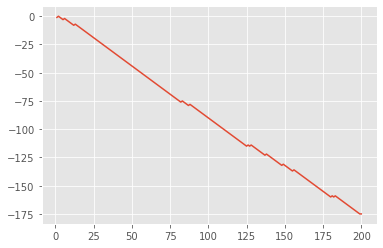

In [71]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=500)
plt.show()